## Housing Price Prediction \- Data Analysis and Modeling

#### This notebook provides a complete analysis and model for predicting housing prices. Steps:

1. Dataset Overview and Initial Exploration

2. Data Cleaning and Preprocessing

3. Exploratory Data Analysis \(EDA\)

4. Model Training and Prediction using Linear Regression

5. Model Evaluation

6. Visualization of Model Fit and Assumptions Comparison



In [67]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


#### Initial Data Exploration

The dataset includes 13 columns such as \`price\`, \`area\`, \`bedrooms\`, \`bathrooms\`, and categorical features like \`mainroad\` and \`furnishingstatus\`.



In [20]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display descriptive statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000 

### Data Information and Summary Statistics

#### Key insights from the summary statistics:

\- Price and area have high variance, indicating wide ranges in the data.

\- Bedrooms, bathrooms, and stories have defined ranges useful for analysis.



In [68]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


#### Data Cleaning Summary

\- No missing values were found, so no need to drop or fill data.



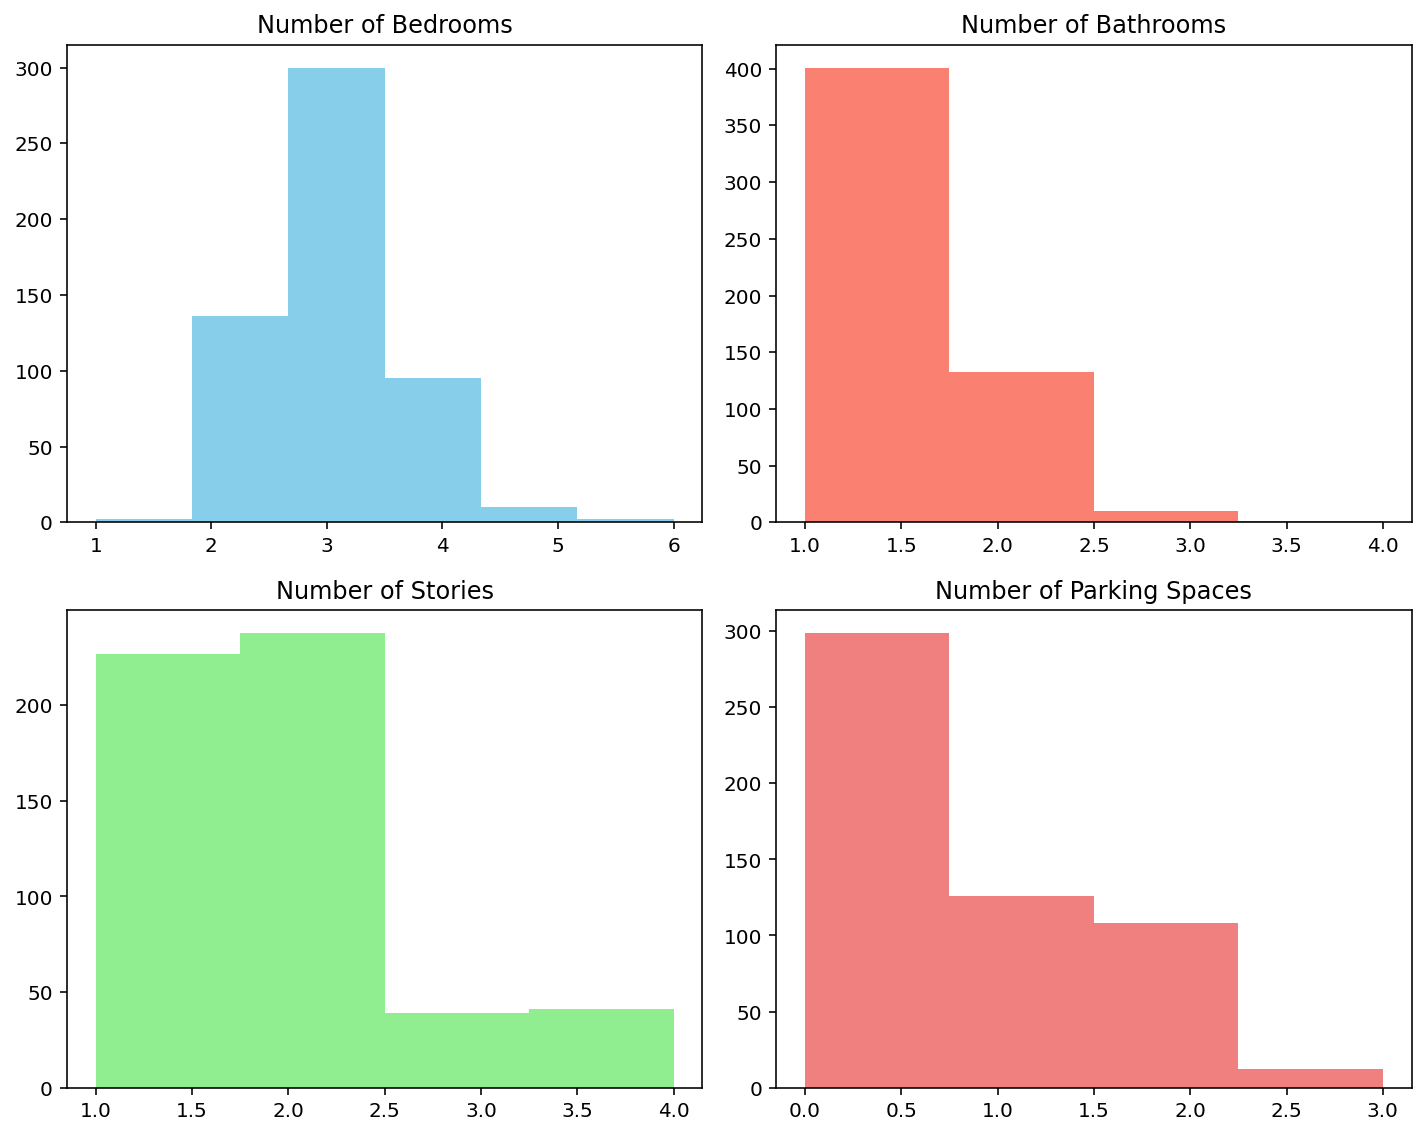

In [71]:
# Plotting histograms for numeric features
plt.figure(figsize=(10, 8))

# Bedrooms
plt.subplot(2, 2, 1)
plt.hist(data['bedrooms'], bins=6, color='skyblue')
plt.title("Number of Bedrooms")

# Bathrooms
plt.subplot(2, 2, 2)
plt.hist(data['bathrooms'], bins=4, color='salmon')
plt.title("Number of Bathrooms")

# Stories
plt.subplot(2, 2, 3)
plt.hist(data['stories'], bins=4, color='lightgreen')
plt.title("Number of Stories")

# Parking
plt.subplot(2, 2, 4)
plt.hist(data['parking'], bins=4, color='lightcoral')
plt.title("Number of Parking Spaces")

plt.tight_layout()
plt.show()

#### Histograms for Numeric Features

This shows the distribution of bedrooms, bathrooms, stories, and parking. For example, most houses have 2\-4 bedrooms and 1\-2 bathrooms.



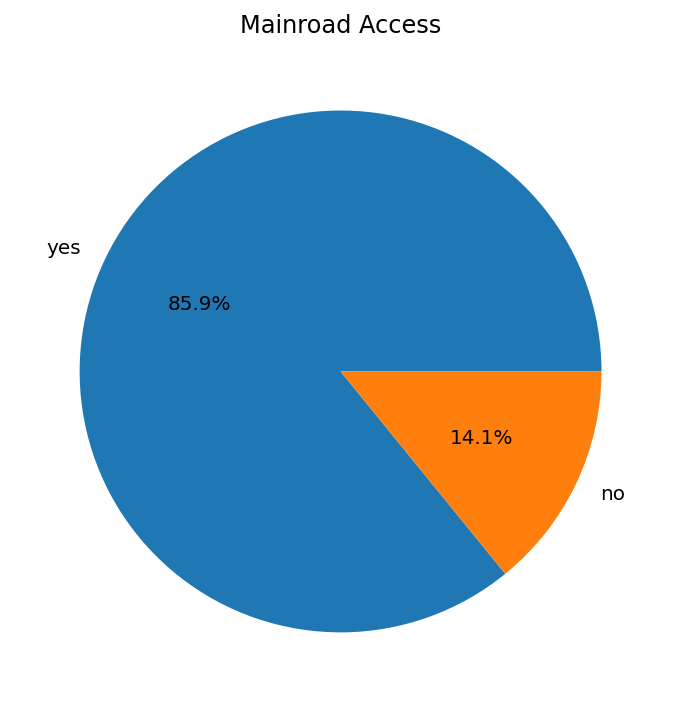

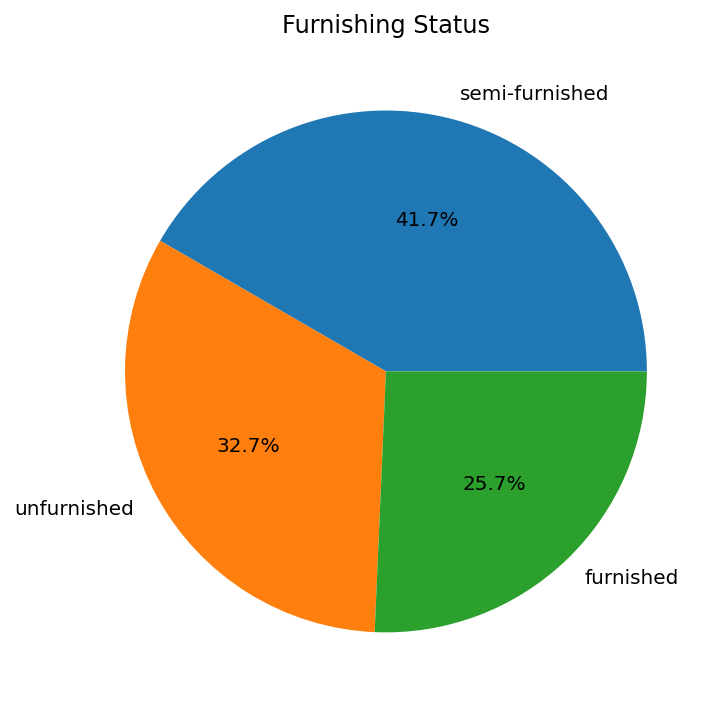

In [61]:
# Load the data
data = pd.read_csv('Housing.csv')

# Pie chart for Mainroad Access
plt.figure(figsize=(6, 6))
mainroad_counts = data['mainroad'].value_counts()
plt.pie(mainroad_counts, labels=mainroad_counts.index, autopct='%1.1f%%')
plt.title("Mainroad Access")
plt.show()

# Pie chart for Furnishing Status
plt.figure(figsize=(6, 6))
furnishing_counts = data['furnishingstatus'].value_counts()
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%')
plt.title("Furnishing Status")

plt.show()

#### Pie Charts for Categorical Features

\- Mainroad Access: Shows the percentage of houses with and without mainroad access.

\- Furnishing Status: Displays proportions of semi\-furnished and unfurnished houses.


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


#### Model Training

A linear regression model was trained on the training set and used to predict prices on the test set.



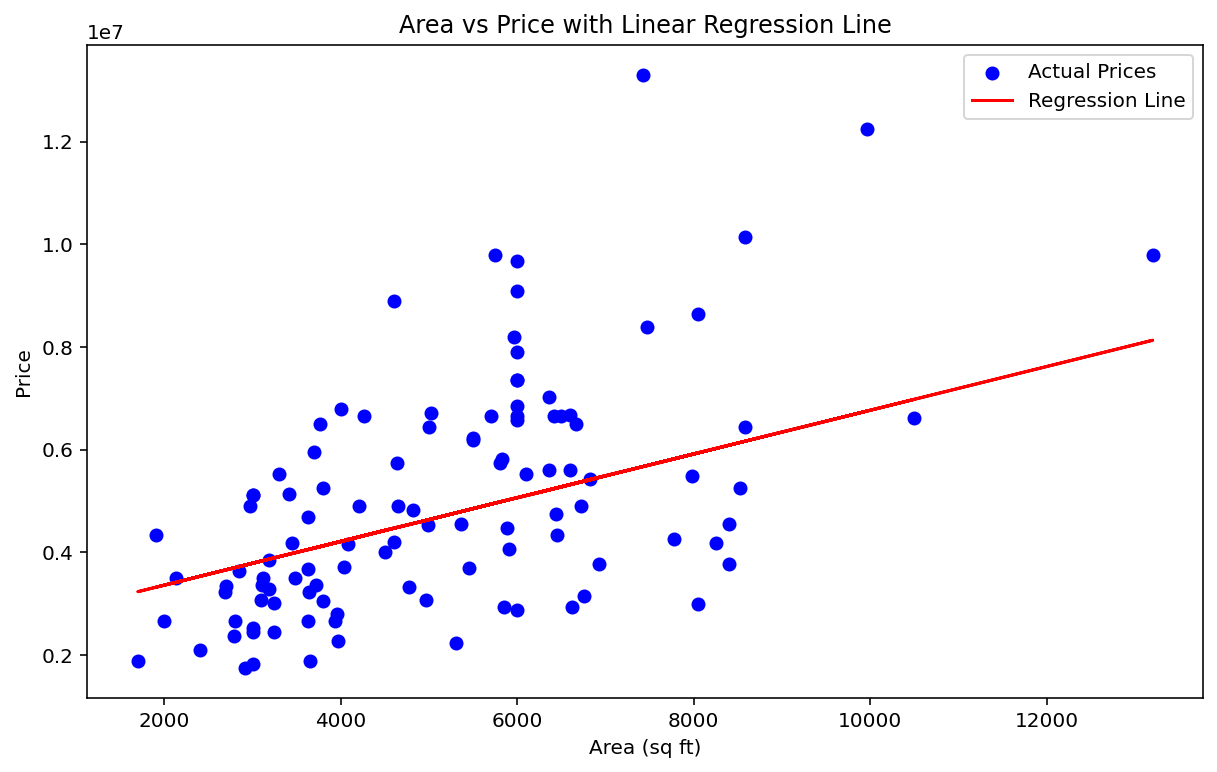

In [74]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Scatter plot of actual prices vs area
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, color='blue', label="Actual Prices")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Area vs Price with Linear Regression Line")

# Predict prices based on the area in X_test for a straight line fit
area_test = X_test[['area']]  
area_model = LinearRegression() 
area_model.fit(X_train[['area']], y_train)

# Plot the regression line
plt.plot(X_test['area'], area_model.predict(area_test), color='red', label="Regression Line")
plt.legend()
plt.show()

#### Visualizing the Linear Regression Line for Area vs Price

After training our model using multiple features, we can focus on a single feature, \`area\`, to visualize the linear relationship between \`area\` and \`price\`. Here, we create a scatter plot of actual prices versus area and overlay a linear regression line to show the predicted trend.



In [76]:
import pandas as pd

# Define the area for which we want to predict the price
fixed_area = 9415

# Create a DataFrame for the input to match the training data format
input_data = pd.DataFrame([[fixed_area]], columns=['area'])

# Use the area_model to predict the price based on the fixed area
predicted_price = area_model.predict(input_data)

# Display the predicted price
print(f"The predicted price for a house with an area of {fixed_area} sq ft is: ${predicted_price[0]:,.2f}")

The predicted price for a house with an area of 9415 sq ft is: $6,520,500.73


In [52]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1754318687330.6628
R-squared: 0.6529242642153186


#### Model Evaluation

\- Mean Squared Error \(MSE\): Shows the average squared difference between actual and predicted values.

\- R\-squared \(R²\): Indicates how well the model captures the variance in \`price\`. Closer to 1 implies a better fit.



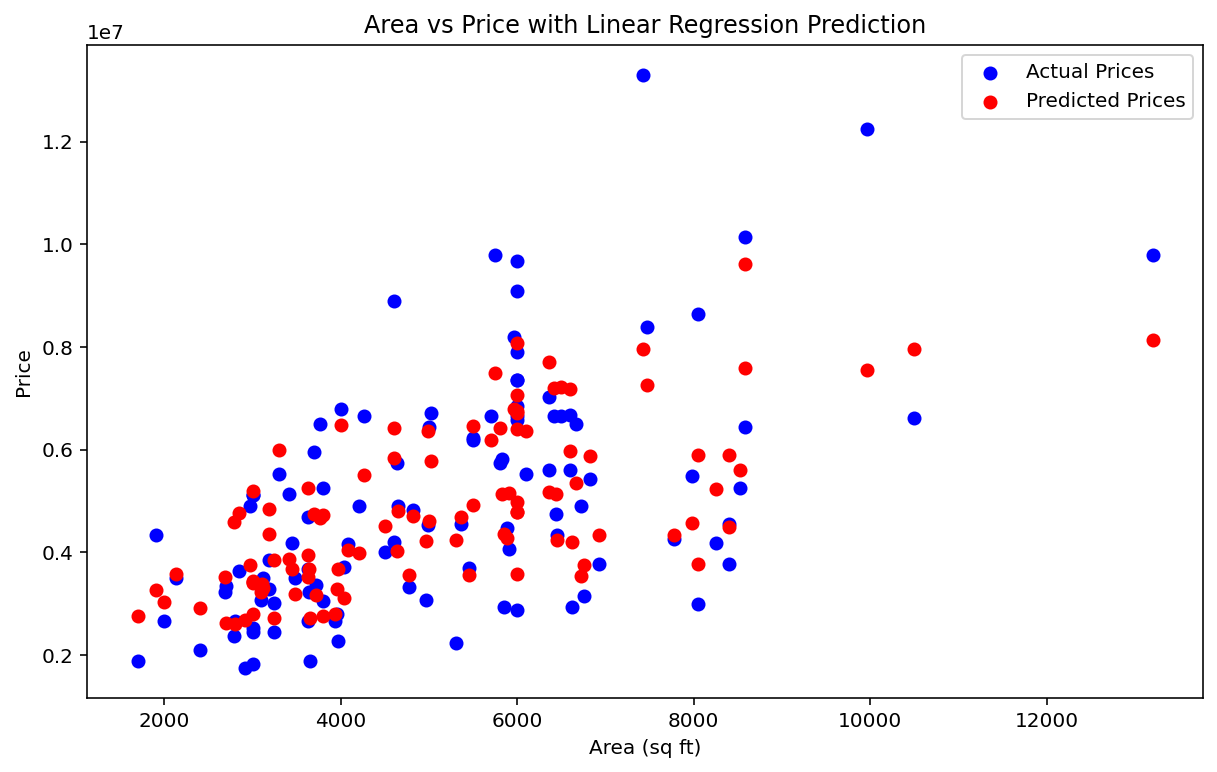

In [73]:
# Plot of area vs price with predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, color='blue', label="Actual Prices")
plt.scatter(X_test['area'], y_pred, color='red', label="Predicted Prices")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.title("Area vs Price with Linear Regression Prediction")
plt.show()

#### Visualization of Linear Regression Fit

This scatter plot shows \`area\` vs \`price\` with actual prices \(blue\) and predicted prices \(red\). This visual confirms the relationship captured by the model.



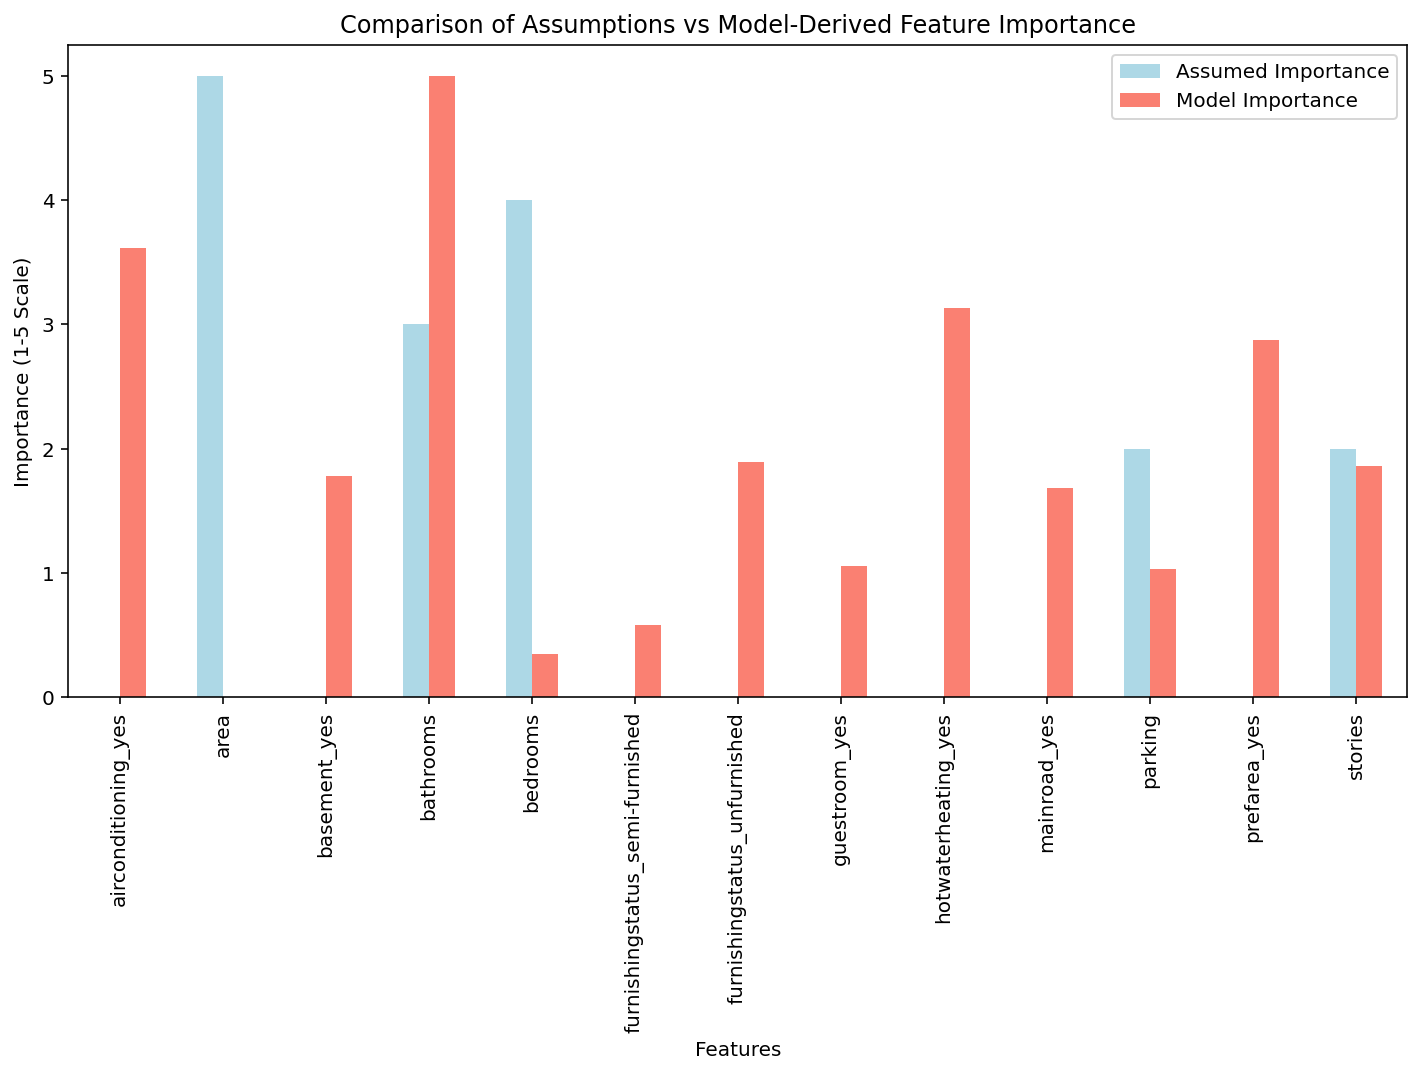

In [54]:
# Comparison between initial assumptions and model results

# Assumptions about feature importance (1 to 5 scale)
assumptions = {"area": 5, "bedrooms": 4, "bathrooms": 3, "stories": 2, "parking": 2}

# Feature importances derived from linear model coefficients
importance = pd.Series(abs(model.coef_), index=X.columns)
model_importance = (importance / importance.max()) * 5  # Scale to match assumptions

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({"Assumed Importance": pd.Series(assumptions), "Model Importance": model_importance})

# Plotting the comparison
comparison_df.plot(kind="bar", figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title("Comparison of Assumptions vs Model-Derived Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance (1-5 Scale)")
plt.show()

#### Assumptions vs Model\-Derived Feature Importance

This chart shows our initial assumptions of feature importance compared to the actual importance derived from model coefficients, helping validate our intuition and identify any surprises.



In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset and create dummy variables for categorical columns
data = pd.read_csv('Housing.csv')
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model on all features
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Ensure the order and structure of input features match those in X_train
input_features = {
    'area': 9415,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 2,
    'mainroad_yes': 1,
    'guestroom_yes': 0,
    'basement_yes': 1,
    'hotwaterheating_yes': 0,
    'airconditioning_yes': 1,
    'parking': 2,
    'prefarea_yes': 1,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

# Convert input dictionary to a DataFrame with the same columns and order as X_train
input_df = pd.DataFrame([input_features], columns=X_train.columns)

# Predict the price
predicted_price = multi_model.predict(input_df)

# Display the predicted price
print(f"The predicted price for the specified house features is: ${predicted_price[0]:,.2f}")

The predicted price for the specified house features is: $8,294,926.66


#### Multiple Regression Model for Predicting House Price



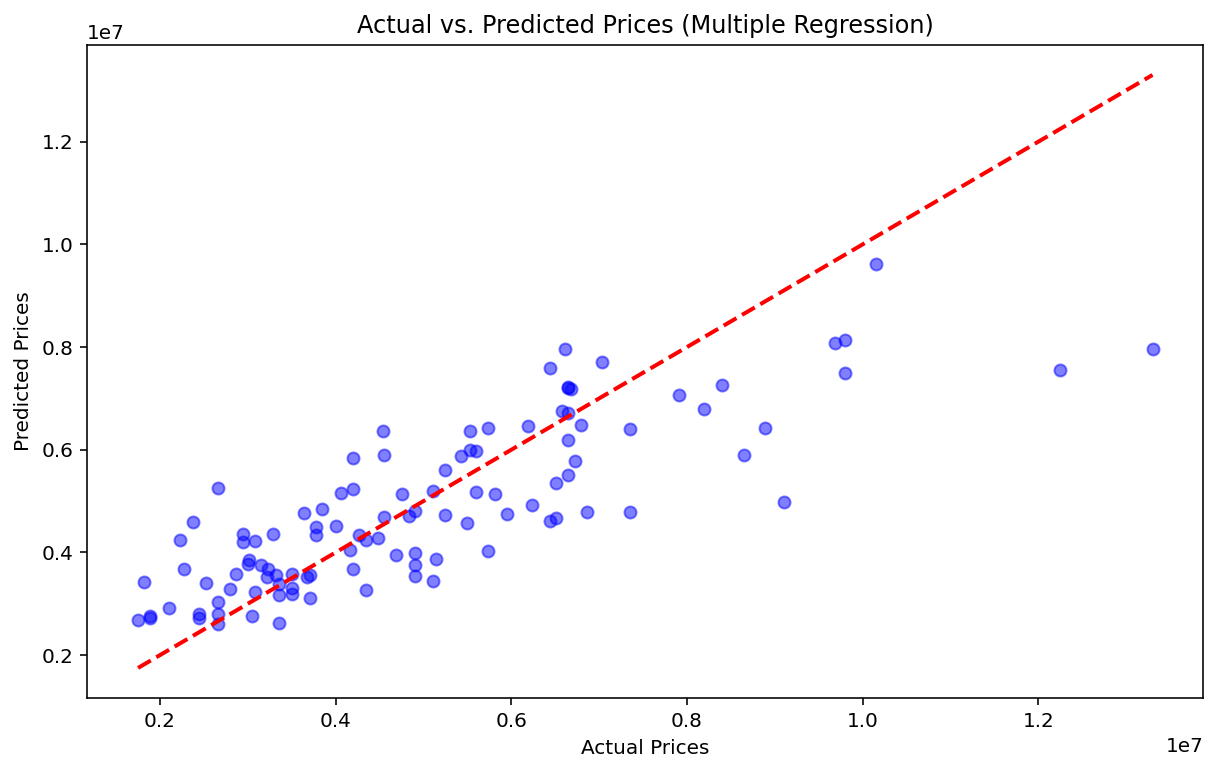

In [81]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Multiple Regression)")
plt.show()

#### Visualizing Model Accuracy: Actual vs. Predicted Prices Scatter Plot

###### This code generates a scatter plot of actual vs. predicted prices with a reference line, helping visualize model accuracy.



### Conclusions

In this analysis, we first used linear regression to predict housing prices based solely on the area. This approach provided a foundational understanding of the relationship between area and price, confirming our initial assumption that area is a significant predictor.

Next, we employed multiple regression, incorporating all relevant features from the dataset. This model enhanced our predictive accuracy, demonstrating the importance of various factors, such as furnishing status and proximity to the main road, in determining housing prices. Overall, our findings indicate that while area is crucial, considering multiple features leads to a more comprehensive understanding of price determinants.
